In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df = pd.read_csv('/Users/dimmyt/Documents/PyCharmProjects/N--DS/N! weekly/weekly2/training_data - training_data.csv', index_col=0) 
df.drop('ID', inplace=True, axis=1)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
73713,Female,70.0,1,0,never,55.57,6.2,130,1
73714,Male,60.0,0,0,No Info,27.32,6.6,160,0
73715,Male,65.0,0,0,former,32.07,5.0,160,0
73716,Male,64.0,0,0,current,30.23,6.2,158,0


In [4]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [5]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [7]:
df['gender'] = df['gender'].replace('Female', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Other', 0.5)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,25.19,6.6,140,0
1,0.0,54.0,0,0,27.32,6.6,80,0
2,1.0,28.0,0,0,27.32,5.7,158,0
3,0.0,36.0,0,0,23.45,5.0,155,0
4,1.0,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
73713,0.0,70.0,1,0,55.57,6.2,130,1
73714,1.0,60.0,0,0,27.32,6.6,160,0
73715,1.0,65.0,0,0,32.07,5.0,160,0
73716,1.0,64.0,0,0,30.23,6.2,158,0


In [5]:
df.drop('smoking_history', inplace=True, axis=1)

In [6]:
df.drop('gender', inplace=True, axis=1)

In [7]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=8)

I read that Males have more chance of havin diabetes, and smoking also increases

so I will transfer data to: 

In [25]:
# XGB
xgb_model = xgb.XGBClassifier()
# Model Tuning
xgb_params = {
    "learning_rate": [0.07, 0.1, 0.12],
    "max_depth":[8, 9],
    "subsample":[1.0,1.1],
    "n_estimators": [100,120]}
xgb_cv_model = RandomizedSearchCV(xgb_model,
                             xgb_params, 
                             cv = 5,
                             n_iter=20,
                             n_jobs = -1, 
                             verbose = 2).fit(X_train,y_train)
xgb_cv_model.best_params_
clf = xgb.XGBClassifier(**xgb_cv_model.best_params_).fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/dimmyt/Documents/PyCharmProjects/N--DS/venv/lib/python3.9/site-package

In [26]:
xgb_cv_model.best_params_

{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.07}

In [11]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier()

In [15]:
y_pred = clf.predict_proba(X_test)
y_pred[:-10]

array([[9.9994135e-01, 5.8630838e-05],
       [9.9273723e-01, 7.2627640e-03],
       [9.9888766e-01, 1.1123238e-03],
       ...,
       [9.9996352e-01, 3.6480800e-05],
       [9.9994224e-01, 5.7730766e-05],
       [9.8049098e-01, 1.9509003e-02]], dtype=float32)

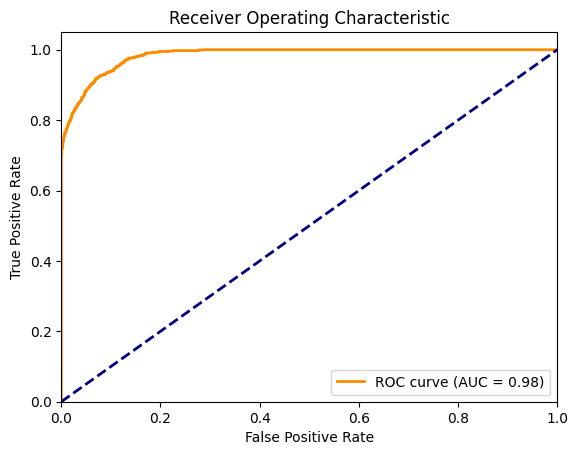

0.983911644867955


In [16]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Имея истинные метки классов и предсказанные вероятности класса "1":
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Вычислить значения TPR и FPR для построения графика ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычислить AUC
auc_score = auc(fpr, tpr)

# Построение графика ROC
def plot_roc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr, tpr)
print(auc_score)

In [17]:
from sklearn.metrics import classification_report

y_true_pred = y_pred[:,1]

y_true_pred = [0 if x < auc_score else 1 for x in y_true_pred]

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12066
           1       1.00      0.68      0.81      1204

    accuracy                           0.97     13270
   macro avg       0.98      0.84      0.90     13270
weighted avg       0.97      0.97      0.97     13270



In [18]:
from sklearn.metrics import classification_report

y_true_pred = y_pred[:,1]

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12066
           1       1.00      0.70      0.83      1204

    accuracy                           0.97     13270
   macro avg       0.98      0.85      0.91     13270
weighted avg       0.97      0.97      0.97     13270



# Описание задания

Вам необходимо построить модель-классификатор по определению диабета. У вас нет никаких ограничений по инструментам, новым полям и способу энкодинга данных.

# О данных

Датасет представляет собой набор медицинских и демографических данных пациентов, а также их диагноз по диабету (положительный или отрицательный). 

Данные включают такие характеристики, как возраст, пол, индекс массы тела (BMI), гипертония, болезни сердца, история курения, уровень HbA1c и уровень глюкозы в крови. Этот набор данных можно использовать для создания моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации.

# Submission задания

Вам будет предоставлен второй датасет, без целевой переменной (таргет - diabetes)
Этот датасет необходимо будет проскорить и сабмитнуть в Google Classroom в формате .csv, с 2 стобцами: `ID` и `prediction`

Поле `prediction` должно быть предсказанием **<span style = 'color : green'> класса </span>** (`predict`), т.е. 1 или 0 а **<span style = 'color : red'>не вероятности </span>** (`predict_proba`)

In [20]:
df_test = pd.read_csv('/Users/dimmyt/Documents/PyCharmProjects/N--DS/N! weekly/weekly2/test_data - test_data.csv', index_col=0) 
IDS = df_test['ID']
df_test.drop('ID', inplace=True, axis=1)
df_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,60.0,1,0,former,23.77,4.8,130
1,Male,2.0,0,0,No Info,15.19,5.0,159
2,Female,74.0,0,0,not current,39.59,6.5,160
3,Female,51.0,0,0,never,26.67,6.6,80
4,Male,35.0,0,0,never,26.09,3.5,159
...,...,...,...,...,...,...,...,...
26141,Female,31.0,0,0,never,27.32,6.1,140
26142,Female,65.0,1,1,never,27.25,5.7,100
26143,Male,30.0,1,0,former,57.17,5.8,300
26144,Male,20.0,0,0,never,32.70,6.2,159


In [21]:
df_test.drop('smoking_history', inplace=True, axis=1)
df_test.drop('gender', inplace=True, axis=1)

In [22]:
df_test

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,60.0,1,0,23.77,4.8,130
1,2.0,0,0,15.19,5.0,159
2,74.0,0,0,39.59,6.5,160
3,51.0,0,0,26.67,6.6,80
4,35.0,0,0,26.09,3.5,159
...,...,...,...,...,...,...
26141,31.0,0,0,27.32,6.1,140
26142,65.0,1,1,27.25,5.7,100
26143,30.0,1,0,57.17,5.8,300
26144,20.0,0,0,32.70,6.2,159


In [23]:
y_pred_answer = clf.predict(df_test)